In [1]:
#DSC 530 - Data Exploration and Analysis
#Final Project
#May, Brandon

from __future__ import print_function, division

import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats
import statsmodels.formula.api as smf
import statistics
from sklearn import linear_model
from scipy.stats import spearmanr
import patsy

#Fixing random state for reproducibility
np.random.seed(19680801)

#Importing our CSV file: heart.csv

data = pd.read_csv("heart.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
#Converting our Categorical Variables using Column names

x = data[['sex', 'fbs','restecg','target', 'exang', 'slope', 'cp']]
x = pd.get_dummies(data=data, drop_first = True)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Defining our Series Variables

#Age of the Participant
age = x['age']

#Total Cholesterol of the Participant
chol = x['chol']

#Systolic Resting Blood Pressure on Hospital Admit of Participant
resting_bp = x['trestbps']

#Fasting Blood Sugar (if >120, coded as 1 in data set, otherwise reported as 0)
fbs = x['fbs']

#Presence of Coronary Artery Disease (1=Present, 0=Absent)
cad_presence = x['target']

#Number of Vessels Imaged with Fluroscopy (via Angiogram)
vessel = x['ca']

#Type of EKG Changes (0 = Normal, 1 = ST-T wave changes, 2 = Likely LVH criteria)
restecg = x['restecg']

#Gender
sex = x['sex']

#Type of Chest Pain (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain, 4 = Asymptomatic)
cp = x['cp']

#Maximum HR Achieved During Stress Testing
maxhr = x['thalach']

#Was there exercise induced angina?
exang = x['exang']

#ST Depression Induced By Exercise Relative to Rest
oldpeak = x['oldpeak']

#Slope of Peak Exercise ST Semengt (1 = Upsloping, 2 = Flat, 3 = Downsloping)
slope = x['slope']


Text(0, 0.5, 'Counts')

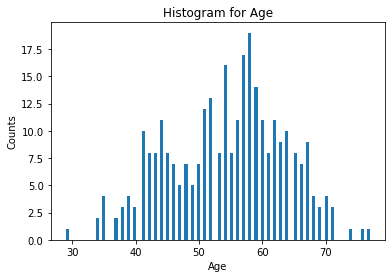

In [5]:
#Plotting our Histograms of our Variable Age

n_bins = 100

plt.hist(age, bins = n_bins)
plt.title("Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

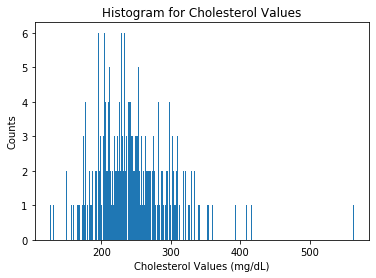

In [6]:
#Plotting Histogram of Variable Cholesterol

n_bins = 400

plt.hist(chol, bins = n_bins)
plt.title("Histogram for Cholesterol Values")
plt.xlabel("Cholesterol Values (mg/dL)")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

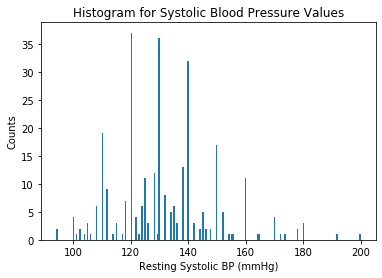

In [7]:
#Plotting Histogram of Variable Systolic Blood Pressure

n_bins = 200

plt.hist(resting_bp, bins = n_bins)
plt.title("Histogram for Systolic Blood Pressure Values")
plt.xlabel("Resting Systolic BP (mmHg)")
plt.ylabel("Counts")

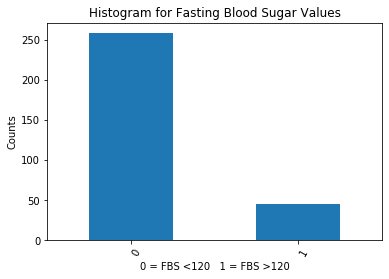

In [8]:
#Plotting Histogram for Fasting Blood Sugar Variable

fbs.value_counts().plot(kind='bar')
plt.title("Histogram for Fasting Blood Sugar Values")
plt.xticks(rotation = +60, horizontalalignment = 'left')
plt.xlabel('0 = FBS <120   1 = FBS >120')
plt.ylabel('Counts')
plt.show()

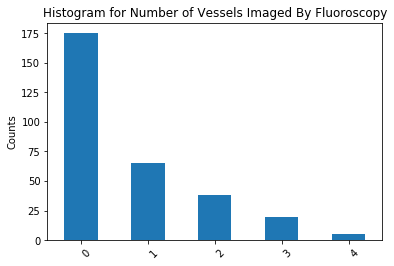

In [9]:
#Plotting number of vessels imaged by fluroscopy variable as histogram

vessel.value_counts().plot(kind='bar', rot = 45)
plt.title("Histogram for Number of Vessels Imaged By Fluoroscopy")
plt.xticks(rotation = 45, horizontalalignment = 'left')
plt.ylabel('Counts')
plt.show()


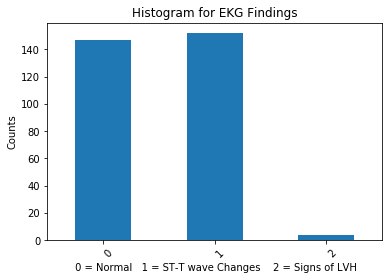

In [10]:
#Plotting Histogram for EKG Changes

restecg.value_counts(sort=False).plot(kind='bar')
plt.title("Histogram for EKG Findings")
plt.xticks(rotation = 45, horizontalalignment = 'left')
plt.xlabel(' 0 = Normal   1 = ST-T wave Changes    2 = Signs of LVH')
plt.ylabel('Counts')
plt.show()

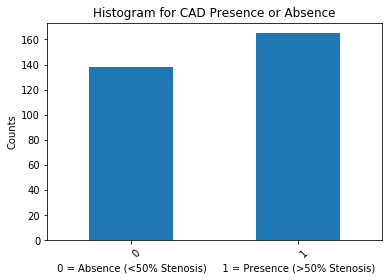

In [11]:
#Plotting Histogram For CAD Presence

cad_presence.value_counts(sort=False).plot(kind='bar')
plt.title("Histogram for CAD Presence or Absence")
plt.xticks(rotation = 45, horizontalalignment = 'left')
plt.xlabel(' 0 = Absence (<50% Stenosis)     1 = Presence (>50% Stenosis)')
plt.ylabel('Counts')
plt.show()
           

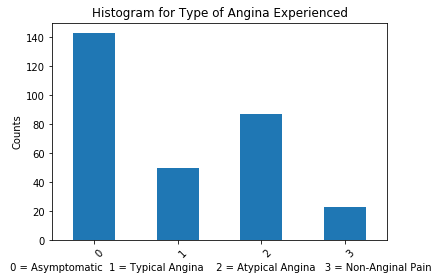

In [12]:
#Plotting Histogram for Type of Angina

cp.value_counts(sort = False).plot(kind='bar')
plt.title("Histogram for Type of Angina Experienced")
plt.xticks(rotation = 45, horizontalalignment = 'left')
plt.xlabel(' 0 = Asymptomatic  1 = Typical Angina    2 = Atypical Angina   3 = Non-Anginal Pain')
plt.ylabel('Counts')
plt.show()

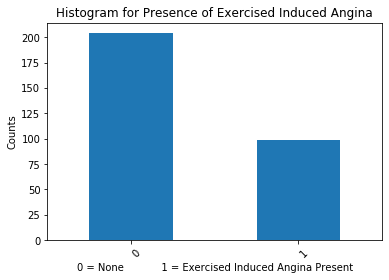

In [13]:
#Plotting Histogram for Presence of Exercise Induced Angina

exang.value_counts(sort = False).plot(kind = 'bar')
plt.title("Histogram for Presence of Exercised Induced Angina")
plt.xticks(rotation = 45, horizontalalignment = 'left')
plt.xlabel('0 = None            1 = Exercised Induced Angina Present')
plt.ylabel('Counts')
plt.show()

In [14]:
#Descriptive Statistics for our Age Variable

print('Descriptive Statistics for Age Variable:\n', age.describe())
print('Mode=\n', statistics.mode(age))

Descriptive Statistics for Age Variable:
 count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64
Mode=
 58


In [15]:
#Descriptive Statistics for our Cholesterol Variable.

print('Descriptive Statistics for Cholesterol Variable:\n', chol.describe())
print('Mode=\n', chol.mode())

Descriptive Statistics for Cholesterol Variable:
 count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64
Mode=
 0    197
1    204
2    234
dtype: int64


In [16]:
#Descriptive Statistics for our Resting BP Variable.

print('Descriptive Statistics for Resting BP Variable:\n', resting_bp.describe())
print('Mode=\n', resting_bp.mode())

Descriptive Statistics for Resting BP Variable:
 count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64
Mode=
 0    120
dtype: int64


In [17]:
#Descriptive Statistics for our Blood Sugar Variable.

print('Descriptive Statistics for Blood Sugar Variable:\n', fbs.describe())
print('Mode=\n', fbs.mode())

Descriptive Statistics for Blood Sugar Variable:
 count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64
Mode=
 0    0
dtype: int64


In [18]:
#Descriptive Statistics for Exercise Induced Angina Variable

print('Descriptive Statistics for Exercise Induced Angina Variable:\n', exang.describe())
print('Mode=\n', exang.mode())

Descriptive Statistics for Exercise Induced Angina Variable:
 count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64
Mode=
 0    0
dtype: int64


In [19]:
#Descriptive Statistics for our Vessel Variable.

print('Descriptive Statistics for Vessel Variable:\n', vessel.describe())
print('Mode=\n', vessel.mode())

Descriptive Statistics for Vessel Variable:
 count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64
Mode=
 0    0
dtype: int64


In [20]:
#Descriptive Statistics for our Resting ECG Variable.

print('Descriptive Statistics for Resting ECG Variable:\n', restecg.describe())
print('Mode=\n', restecg.mode())

Descriptive Statistics for Resting ECG Variable:
 count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64
Mode=
 0    1
dtype: int64


In [21]:
#Descriptive Statistics for our CAD Presence Variable.

print('Descriptive Statistics for CAD Presence Variable:\n', cad_presence.describe())
print('Mode=\n', cad_presence.mode())

Descriptive Statistics for CAD Presence Variable:
 count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64
Mode=
 0    1
dtype: int64


In [22]:
#Subsetting Variables for CAD Presence and Absence

cadpres = data[['target','chol']]

cadpresent = cadpres[cadpres.target == 1]
cadnegative = cadpres[cadpres.target != 1]

bpcad = data[['trestbps', 'target']]

cadpresent2 = bpcad[bpcad.target == 1]
cadnegative2 = bpcad[bpcad.target != 1]

agecad = data[['age', 'target']]

cadpresent3 = agecad[agecad.target == 1]
cadnegative3 = agecad[agecad.target != 1]


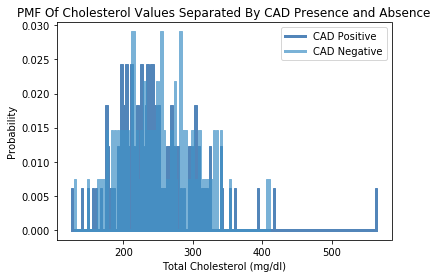

<Figure size 576x432 with 0 Axes>

In [23]:
#Generating PMF For CAD Presence and Absence with Cholesterol

width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent['chol'])
other_pmf = thinkstats2.Pmf(cadnegative['chol'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative')
thinkplot.Config(xlabel = 'Total Cholesterol (mg/dl)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Cholesterol Values Separated By CAD Presence and Absence'
               , xlabel = "Total Cholesterol (mg/dl)",)



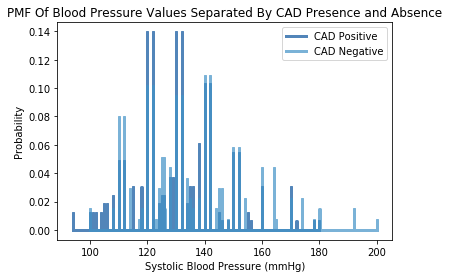

<Figure size 576x432 with 0 Axes>

In [24]:
#Generating PMF for Blood Pressure Values and CAD Presence/Absence

width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent2['trestbps'])
other_pmf = thinkstats2.Pmf(cadnegative2['trestbps'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative')
thinkplot.Config(xlabel = 'Systolic Blood Pressure (mmHg)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Blood Pressure Values Separated By CAD Presence and Absence'
               , xlabel = "Systolic Blood Pressure (mmHg)",)



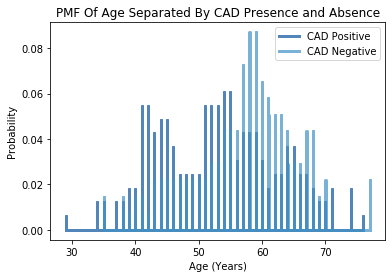

<Figure size 576x432 with 0 Axes>

In [25]:
#Generating PMF For Age and CAD Presence/Absence

width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent3['age'])
other_pmf = thinkstats2.Pmf(cadnegative3['age'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative')
thinkplot.Config(xlabel = 'Age (Years)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Age Separated By CAD Presence and Absence'
               , xlabel = "Age (Years)",)

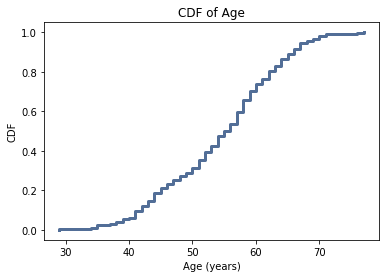

<Figure size 576x432 with 0 Axes>

In [26]:
#Plotting CDF for Age

cdf = thinkstats2.Cdf(data.age)
thinkplot.Cdf(cdf)
thinkplot.Show(title = 'CDF of Age', xlabel = "Age (years)", ylabel = "CDF")

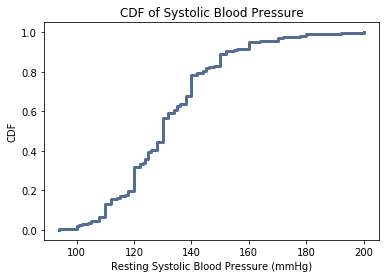

<Figure size 576x432 with 0 Axes>

In [27]:
#Plotting CDF for Resting BP

cdf = thinkstats2.Cdf(data.trestbps)
thinkplot.Cdf(cdf)
thinkplot.Show(title = 'CDF of Systolic Blood Pressure', xlabel = "Resting Systolic Blood Pressure (mmHg)", ylabel = "CDF")

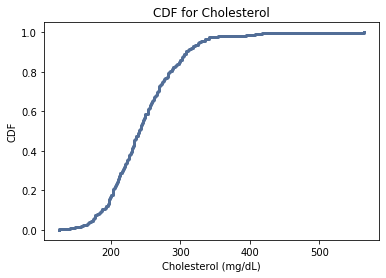

<Figure size 576x432 with 0 Axes>

In [28]:
#Plotting CDF for Cholesterol

cdf = thinkstats2.Cdf(data.chol)
thinkplot.Cdf(cdf)
thinkplot.Show(title = 'CDF for Cholesterol', xlabel = "Cholesterol (mg/dL)", ylabel = "CDF")

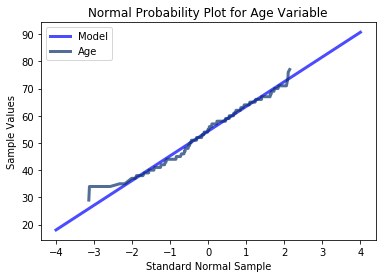

<Figure size 576x432 with 0 Axes>

In [29]:
#Plotting lognormal distribution for age variable

def MakeNormalPlot(age):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Age')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot(age)

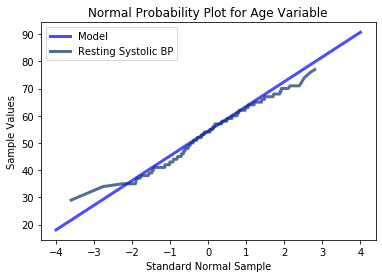

<Figure size 576x432 with 0 Axes>

In [30]:
def MakeNormalPlot(resting_bp):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Resting Systolic BP')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot(resting_bp)

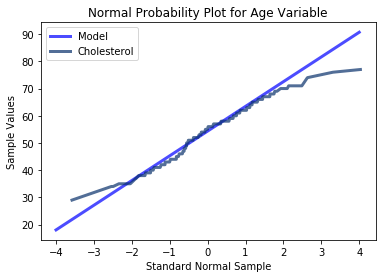

<Figure size 576x432 with 0 Axes>

In [31]:
def MakeNormalPlot(chol):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Cholesterol')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot(chol)

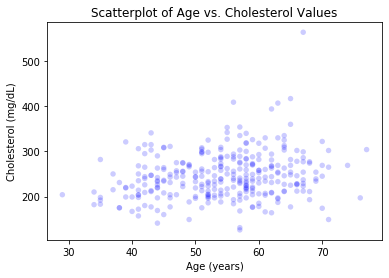

<Figure size 576x432 with 0 Axes>

In [32]:
#Generating Scatter Plot Between Age and Cholesterol

thinkplot.Scatter(age, chol)
thinkplot.Show(title = "Scatterplot of Age vs. Cholesterol Values",
               xlabel = 'Age (years)',
               ylabel = "Cholesterol (mg/dL)")

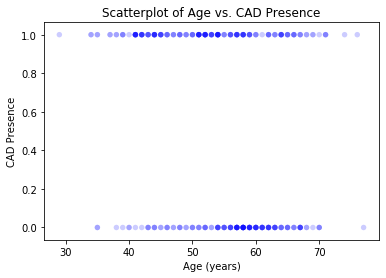

<Figure size 576x432 with 0 Axes>

In [33]:
#Generating Scatter Plot Between Age and CAD Presence

thinkplot.Scatter(age, cad_presence)
thinkplot.Show(title = "Scatterplot of Age vs. CAD Presence",
              xlabel = "Age (years)",
              ylabel = "CAD Presence")

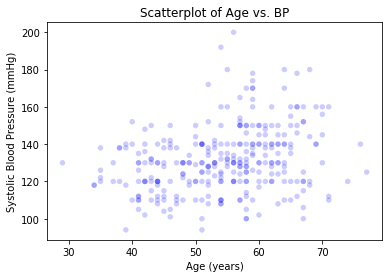

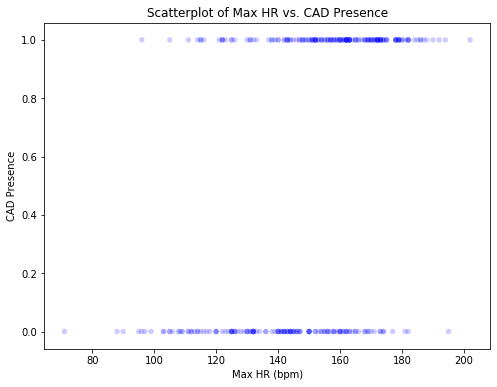

<Figure size 576x432 with 0 Axes>

In [34]:
#Generating Scatterplot Between Age and BP

thinkplot.Scatter(age, resting_bp)
thinkplot.Show(title = 'Scatterplot of Age vs. BP',
              xlabel = "Age (years)",
              ylabel = "Systolic Blood Pressure (mmHg)")


#Generating Scatterplot Between Max HR and CAD Presence or Absence

thinkplot.Scatter(maxhr, cad_presence)
thinkplot.Show(title = 'Scatterplot of Max HR vs. CAD Presence',
              xlabel = 'Max HR (bpm)',
              ylabel = "CAD Presence")


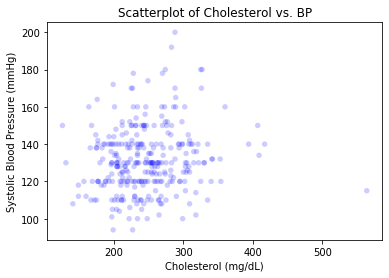

<Figure size 576x432 with 0 Axes>

In [35]:
#Generating Scatterplot Between Cholesterol and BP

thinkplot.Scatter(chol, resting_bp)
thinkplot.Show(title = 'Scatterplot of Cholesterol vs. BP',
              xlabel = "Cholesterol (mg/dL)",
              ylabel = "Systolic Blood Pressure (mmHg)")

In [36]:
spearmanr(age, chol)

SpearmanrResult(correlation=0.19578599445342354, pvalue=0.0006099143222853829)

In [37]:
spearmanr(age, cad_presence)

SpearmanrResult(correlation=-0.23840007068165472, pvalue=2.749629002494309e-05)

In [38]:
spearmanr(chol, cad_presence)

SpearmanrResult(correlation=-0.12088824156566064, pvalue=0.03543859768753631)

In [39]:
spearmanr(resting_bp, cad_presence)

SpearmanrResult(correlation=-0.12159275169859758, pvalue=0.03437372848974978)

In [40]:
spearmanr(exang, cad_presence)

SpearmanrResult(correlation=-0.43675708335330304, pvalue=1.5208138383314295e-15)

In [41]:
spearmanr(age, resting_bp)

SpearmanrResult(correlation=0.28561681085475227, pvalue=4.2617094650124673e-07)

In [42]:
spearmanr(chol, resting_bp)

SpearmanrResult(correlation=0.1265616334594462, pvalue=0.027608539162108658)

In [43]:
spearmanr(restecg, cad_presence)

SpearmanrResult(correlation=0.148611539362244, pvalue=0.009581602703497604)

In [44]:
data.corr(method='spearman')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


In [45]:
#Hypothesis Testing Using Spearman's Correlation

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.SpearmanCorr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data2 = data.dropna(subset=['age', 'chol'])
data3 = data2.age.values, data2.chol.values
ht = CorrelationPermute(data3)
pvalue = ht.PValue()

print(pvalue)

0.001


In [46]:
data4 = data.dropna(subset=['age', 'trestbps'])
data5 = data.age.values, data.trestbps.values
ht = CorrelationPermute(data5)
pvalue = ht.PValue()

print(pvalue)

0.0


In [47]:
data6 = data.dropna(subset=['chol', 'trestbps'])
data7 = data.chol.values, data.trestbps.values
ht = CorrelationPermute(data5)
pvalue = ht.PValue()

print(pvalue)

0.0


In [48]:
#Based on this hypothesis testing on the three spearman correlations these all have p-values <0.001 meaning that a 
#statistically significant relationship based on those correlations is likely and these are unlikely to have occurred 
#by chance.

In [49]:
#Regression Analyses using CAD Presence as Outcome (Dependent Variable)

formula = 'cad_presence ~ age + chol + resting_bp'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.658835
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.04402
Time:                        17:24:25   Log-Likelihood:                -199.63
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 0.0003665
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3543      1.132      3.846      0.000       2.135       6.573
age           -0.0453      0.

Intercept     77.812017
age            0.955669
chol           0.998623
resting_bp     0.989729
dtype: float64

In [50]:
#Regressions Analyses Using CAD Presence as Outcome(Dependent Variable)

formula = 'cad_presence ~ age'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.03778
Time:                        17:24:25   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

Intercept    20.826672
age           0.948995
dtype: float64

In [51]:
formula = 'cad_presence ~ chol'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.685527
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                0.005288
Time:                        17:24:25   Log-Likelihood:                -207.71
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                    0.1373
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0016      0.571      1.753      0.080      -0.118       2.122
chol          -0.0033      0.

Intercept    2.722680
chol         0.996667
dtype: float64

In [52]:
formula = 'cad_presence ~ resting_bp'
results = smf.logit(formula, data = data). fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.678589
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.01536
Time:                        17:24:26   Log-Likelihood:                -205.61
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                   0.01133
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4093      0.904      2.665      0.008       0.637       4.181
resting_bp    -0.0169      0.

Intercept     11.126475
resting_bp     0.983214
dtype: float64

In [53]:
formula = 'cad_presence ~ restecg'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.679695
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                 0.01375
Time:                        17:24:26   Log-Likelihood:                -205.95
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                   0.01655
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0981      0.164     -0.600      0.548      -0.419       0.222
restecg        0.5313      0.

Intercept    0.906518
restecg      1.701169
dtype: float64

In [54]:
formula = 'cad_presence ~ fbs + exang'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.590423
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                  0.1433
Time:                        17:24:26   Log-Likelihood:                -178.90
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.013e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8457      0.161      5.245      0.000       0.530       1.162
fbs           -0.1175      0.

Intercept    2.329661
fbs          0.889122
exang        0.132328
dtype: float64

In [55]:
formula = 'cad_presence ~ vessel'
results = smf.logit(formula, data = data).fit()
print(results.summary())
np.exp(results.params)

Optimization terminated successfully.
         Current function value: 0.606642
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           cad_presence   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                  0.1198
Time:                        17:24:27   Log-Likelihood:                -183.81
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.528e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8099      0.154      5.247      0.000       0.507       1.112
vessel        -0.9093      0.

Intercept    2.247770
vessel       0.402807
dtype: float64